<h1>IR Assignment 5 - 41117 (P1)</h1>

<b>Write a program to implement simple web crawler.</b>

In [17]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt

!pip install wordcloud
from wordcloud import WordCloud

# Get page from website used to test web scraping
f = requests.get('http://quotes.toscrape.com/')

In [18]:
# Parse raw data with Beautiful Soup
soup = BeautifulSoup(f.text)
print(soup.get_text())




Quotes to Scrape








Quotes to Scrape




Login






“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
by Albert Einstein
(about)


            Tags:
            
change
deep-thoughts
thinking
world



“It is our choices, Harry, that show what we truly are, far more than our abilities.”
by J.K. Rowling
(about)


            Tags:
            
abilities
choices



“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
by Albert Einstein
(about)


            Tags:
            
inspirational
life
live
miracle
miracles



“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
by Jane Austen
(about)


            Tags:
            
aliteracy
books
classic
humor



“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
by Marilyn Monroe


In [19]:
# Print text from element in div with class quote
for i in soup.findAll("div",{"class":"quote"}):
    print((i.find("span",{"class":"text"})).text)
    
for i in soup.findAll("div",{"class":"quote"}):
    print((i.find("small",{"class":"author"})).text)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”
Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André G

In [20]:
for i in soup.findAll("div",{"class":"tags"}):
    print((i.find("meta"))['content'])

change,deep-thoughts,thinking,world
abilities,choices
inspirational,life,live,miracle,miracles
aliteracy,books,classic,humor
be-yourself,inspirational
adulthood,success,value
life,love
edison,failure,inspirational,paraphrased
misattributed-eleanor-roosevelt
humor,obvious,simile


In [21]:
# Create lists to store data
quotes=[]
authors=[]
tags=[]

To access other pages on the website, we can use quotes.toscrape.com/page/n/ where 'n' is an integer

In [22]:
# Scraping data for the first 10 pages
for pages in range(1,10):    
    f1 = requests.get('http://quotes.toscrape.com/page/'+str(pages))
    soup = BeautifulSoup(f1.text)    
    
    for i in soup.findAll("div",{"class":"quote"}):
        quotes.append((i.find("span",{"class":"text"})).text)  
        authors.append((i.find("small",{"class":"author"})).text)   
        
    for k in soup.findAll("div",{"class":"tags"}):
        tags.append((k.find("meta"))['content'])

Create a dataframe out of these columns

In [23]:
df = pd.DataFrame({'Quotes':quotes,'Authors':authors,'Tags':tags})
df.head()

,Quotes,Authors,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change,deep-thoughts,thinking,world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities,choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational,life,live,miracle,miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy,books,classic,humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself,inspirational"


Get general statistics about dataframe

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Quotes   90 non-null     object
 1   Authors  90 non-null     object
 2   Tags     90 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [25]:
len(df)

90

Create a word cloud of tags

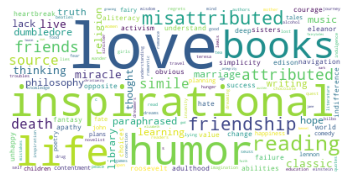

In [26]:
wordcloud = WordCloud(background_color='white').generate(' '.join(df['Tags']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()